In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = '''
#  nocc  nkpts      homo            lumo              HF             MP2_CORR          CCD           (T)                 AFQMC/HF                AFQMC/CID             AFQMC/CCD_PT   
    7     19    -0.0009454319   0.0461749157    -0.8125485302     -0.4063746722   -0.136903496  -0.0081865998     -0.947382 +/- 0.000850  -0.953628 +/- 0.000488  -0.953763 +/- 0.000401
    19    57    -0.0267984007   -1.34650e-05    -2.1455519866     -1.1379947533   -0.369880321  -0.0762836321     -2.532349 +/- 0.000977  -2.544129 +/- 0.001435  -2.543068 +/- 0.001173
    27    81    -0.0205661887   0.0127205893    -3.0401052980     -1.0480662111   -0.532419322  -0.1029884666     -3.605628 +/- 0.000996  -3.613918 +/- 0.001270  -3.620589 +/- 0.001141
    33    81    0.00125225307   0.0187435440    -3.4570460280     -1.9533518997   -0.587769614  -0.1819556756     -4.069898 +/- 0.002695  -4.085569 +/- 0.001862  -4.102059 +/- 0.001865
#    57    171  -0.02659808523   -0.0118986911   -5.5999074601     -5.6782780087   -3.363797920  -6.306451382      -6.938204 +/- 0.002806  -7.025344 +/- 0.005667   -7.025344 +/- 0.005667
#    81    251                                                      
#    93    251   
'''
nocc = []
nkpts = []
homo = []
lumo = []
ehf = []
mp2_corr = []
ccsd_corr = []
ccsd_t = []
afqmc_hf = []
afqmc_hf_err = []
afqmc_ci = []
afqmc_ci_err = []
afqmc_pt = []
afqmc_pt_err = []

for line in data.splitlines():
    if not line.startswith('#') and len(line) > 0:
        parts = line.split()
        if len(parts) == 17:
            nocc = np.hstack((nocc,int(parts[0])))
            nkpts = np.hstack((nkpts,int(parts[1])))
            homo = np.hstack((homo,float(parts[2])))
            lumo = np.hstack((lumo,float(parts[3])))
            ehf = np.hstack((ehf,float(parts[4])))
            mp2_corr = np.hstack((mp2_corr,float(parts[5])))
            ccsd_corr = np.hstack((ccsd_corr,float(parts[6])))
            ccsd_t = np.hstack((ccsd_t,float(parts[7])))
            afqmc_hf = np.hstack((afqmc_hf,float(parts[8])))
            afqmc_hf_err = np.hstack((afqmc_hf_err,float(parts[10])))
            afqmc_ci = np.hstack((afqmc_ci,float(parts[11])))
            afqmc_ci_err = np.hstack((afqmc_ci_err,float(parts[13])))
            afqmc_pt = np.hstack((afqmc_pt,float(parts[14])))
            afqmc_pt_err = np.hstack((afqmc_pt_err,float(parts[16])))

In [20]:
afqmc_hf/nocc/2

array([-0.06767014, -0.06664076, -0.06677089, -0.06166512])

In [3]:
nelec = nocc*2
gap = (lumo - homo)*27.2114
inv_gap = 1/gap
ehf_pe = ehf/nelec
mp2_corr_pe = mp2_corr/nelec
emp2_pe = ehf_pe + mp2_corr_pe
ccsd_corr_pe = ccsd_corr/nelec
eccsd_pe = ehf_pe + ccsd_corr_pe
ccsd_t_pe = ccsd_t/nelec
eccsd_t_pe = eccsd_pe + ccsd_t_pe
afqmc_hf_pe = afqmc_hf/nelec
afqmc_hf_err_pe = afqmc_hf_err/nelec
afqmc_ci_pe = afqmc_ci/nelec
afqmc_ci_err_pe = afqmc_ci_err/nelec
afqmc_pt_pe = afqmc_pt/nelec
afqmc_pt_err_pe = afqmc_pt_err/nelec

In [4]:
idx = np.argsort(inv_gap)

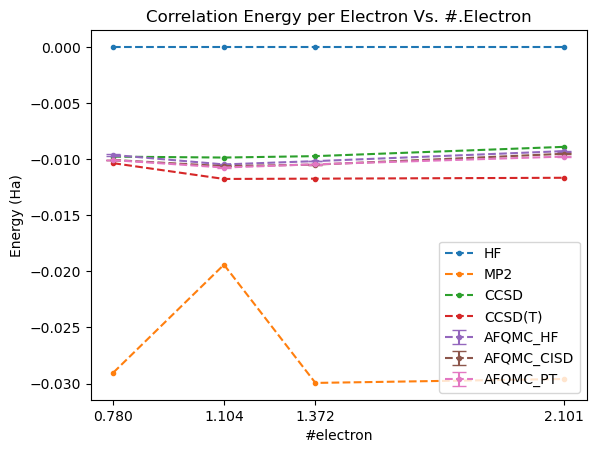

In [5]:
from matplotlib import pyplot as plt
plt.plot(inv_gap[idx],ehf_pe[idx]-ehf_pe[idx],'.--',color='C0',label='HF')
plt.plot(inv_gap[idx],emp2_pe[idx]-ehf_pe[idx],'.--',color='C1',label='MP2')
plt.plot(inv_gap[idx],eccsd_pe[idx]-ehf_pe[idx],'.--',color='C2',label='CCSD')
plt.plot(inv_gap[idx],eccsd_t_pe[idx]-ehf_pe[idx],'.--',color='C3',label='CCSD(T)')
plt.errorbar(inv_gap[idx],afqmc_hf_pe[idx]-ehf_pe[idx],yerr=afqmc_hf_err_pe[idx],fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(inv_gap[idx],afqmc_ci_pe[idx]-ehf_pe[idx],yerr=afqmc_ci_err_pe[idx],fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(inv_gap[idx],afqmc_pt_pe[idx]-ehf_pe[idx],yerr=afqmc_pt_err_pe[idx],fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(inv_gap[idx])
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Correlation Energy per Electron Vs. #.Electron')
plt.legend()
plt.show()

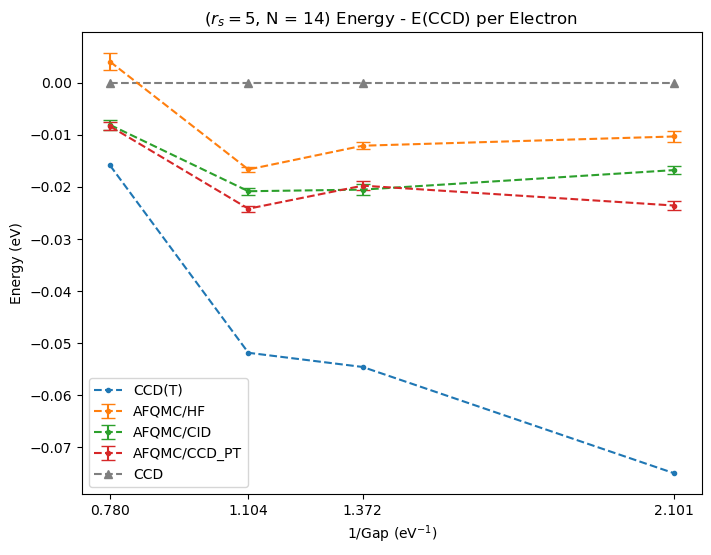

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(inv_gap[idx],27.2114*eccsd_pe[idx]-27.2114*eccsd_pe[idx],'^--',color='C7',label='CCD')
plt.plot(inv_gap[idx],27.2114*eccsd_t_pe[idx]-27.2114*eccsd_pe[idx],'.--',color='C0',label='CCD(T)')
plt.errorbar(inv_gap[idx],27.2114*afqmc_hf_pe[idx]-27.2114*eccsd_pe[idx],yerr=27.2114*afqmc_hf_err_pe[idx],fmt='.--',capsize=5,color='C1',label='AFQMC/HF')
plt.errorbar(inv_gap[idx],27.2114*afqmc_ci_pe[idx]-27.2114*eccsd_pe[idx],yerr=27.2114*afqmc_ci_err_pe[idx],fmt='.--',capsize=5,color='C2',label='AFQMC/CID')
plt.errorbar(inv_gap[idx],27.2114*afqmc_pt_pe[idx]-27.2114*eccsd_pe[idx],yerr=27.2114*afqmc_pt_err_pe[idx],fmt='.--',capsize=5,color='C3',label='AFQMC/CCD_PT')
plt.xticks(inv_gap[idx])
plt.xlabel('1/Gap (eV$^{-1}$)')
plt.ylabel('Energy (eV)')
plt.title('($r_s = 5$, N = 14) Energy - E(CCD) per Electron ')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['CCD(T)', 'AFQMC/HF', 'AFQMC/CID', 'AFQMC/CCD_PT', 'CCD']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels) #,loc='upper left')
plt.show()

In [26]:
pt_ccd = 27.2114*(afqmc_pt_pe[idx]-eccsd_pe[idx])
pt_ccd = pt_ccd[1:]
pt_ccd.mean()

np.float64(-0.022537023715486954)